In [3]:
from dateutil.parser import parse
from datetime import datetime, date

    
def calculate_age(birthdateStr):
    """ Calculates the age from a string containing the birthdate.
    birthdateStr must have the format "YYYY-MM-DD" or "YYYY-MM-DD HH:MM:SS"
    
    Error checking:
    This code also checks that birthdateStr can be parsed using dateutil's parse.
    If birthdateStr is not a true string and can't be parsed (parse gives an AttributeError), 
    this code catches that error, prints an error message, and returns a 0.  
    It doesn't catch other types of errors.
    """
    
    # Some of the birthdates from EP_data.csv couldn't be parsed
    # This try, except catches those birthdates to prevent the program
    # from crashing.  
    try:
        # parse takes a date in the format "YYYY-MM-DD" or "YYYY-MM-DD HH:MM:SS"
        # and parses it into a Python datetime object, which is very useful for
        # working with dates
        birthdate = parse(birthdateStr).date()
    except AttributeError:
        print "Could not parse birthdateStr ", birthdateStr
        return 0
    today = date.today()
    hasBirthdayNotPassed = ((today.month, today.day) < (birthdate.month, birthdate.day))
    # Use fact that FALSE converts to 0 and TRUE converts to 1 to subtract 1 if birthday
    # has NOT passed.
    return today.year - birthdate.year - int(hasBirthdayNotPassed)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def drawHistogram(dataArray):
    """
        This function takes in a numpy array and draws the histogram for that array.
        It prints out the total number of data points to check that histogram has binned
        every possible data point.
        
        To use in iPython Notebook, make sure the following line is included, so matplotlib
        plots inside the notebook:
        
        %matplotlib inline
        
    """
    hist, bins = np.histogram(dataArray)
    print "Total number of data points = ", sum(hist)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

birthdate for row  0  is  1997-03-31
age for row  0  is  18
birthdate for row  20000  is  1947-12-31
age for row  20000  is  67
birthdate for row  40000  is  1991-08-31
age for row  40000  is  23
Could not parse birthdateStr  nan
birthdate for row  60000  is  1989-03-09
age for row  60000  is  26
birthdate for row  80000  is  1989-03-09
age for row  80000  is  26
Could not parse birthdateStr  nan
birthdate for row  100000  is  1997-09-30
age for row  100000  is  17
birthdate for row  120000  is  1995-10-31
age for row  120000  is  19
birthdate for row  140000  is  1970-10-31
age for row  140000  is  44
birthdate for row  160000  is  1963-01-31
age for row  160000  is  52
birthdate for row  180000  is  1999-10-31
age for row  180000  is  15
birthdate for row  200000  is  1989-03-09
age for row  200000  is  26
birthdate for row  220000  is  1934-01-31
age for row  220000  is  81
birthdate for row  240000  is  1999-10-31
age for row  240000  is  15
birthdate for row  260000  is  1999-04-3

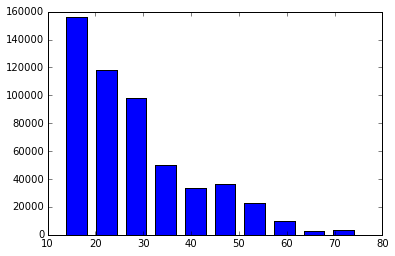

In [5]:
if __name__ == "__main__":
    
    # keep track of the number of missing values, i.e. empty birthdate strings
    nMissing = 0

    # Some users have put in a false birthdate, so we have to filter out
    # the "legitimate" ages.
    # The minimum age for using ExperienceProject is 13, so it is legitAgeMin
    # The maximum age is more arbitrary.  100 seems reasonable.
    legitAgeMin = 13 
    legitAgeMax = 75

    # contains all data, including missing or corrupt values (which are assigned an age of 0)
    # and ages outside the range [legitAgeMin, legitAgeMax].
    allAgeList = [] 
    
    # only contains ages within [legitAgeMin, legitAgeMax]
    legitAgeList = [] 

    # CHANGE THIS TO YOUR LOCATION OF THE DATA FILE
    dataFilePath = "/Users/dharshid/CDIPS_Project/data/EP_data.csv"
    import pandas as pd
    EPData = pd.read_csv(dataFilePath)
    
    for irow in range(0,EPData.shape[0]):
        if EPData.loc[irow,'birthdate']=="":
            age = 0
            nMissing += 1
            allAgeList.append(age)
        else:
            age = calculate_age(EPData.loc[irow,'birthdate'])
            if age > legitAgeMax or age < legitAgeMin:
                allAgeList.append(age)
            else:
                allAgeList.append(age)
                legitAgeList.append(age)

        # print info every several iterations to make sure code is running
        if irow % 20000 == 0:
            print "birthdate for row ", irow, " is ", EPData.loc[irow,'birthdate']
            print "age for row ", irow, " is ", age

    print "Number of missing values is ", nMissing
    print len(allAgeList)
    print len(legitAgeList)

    # Need this line or matplotlib won't plot within iPython Notebook
    %matplotlib inline
    drawHistogram(np.array(legitAgeList))

In [14]:
EPData['age'] = allAgeList

In [18]:
import pandas as pd
EPData.to_csv("EP_with_age.csv")

In [55]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
fans_lm=ols('num_fans ~ C(gender)', data=EPData).fit()

In [62]:
#EPData = pd.read_csv("EP_with_age.csv")
Data = EPData.loc[EPData['age']<80,]
age = np.array(Data['age'])
support = []
bin_seq = range(1,20)# a bin size sequence for trial

In [68]:
support

[14909.007075958387,
 14400.272721655858,
 15036.825425781948,
 15584.908346173899,
 12366.27761819789,
 15290.198266692791,
 7533.6827769680003,
 8834.1299729283437,
 10380.778819582474,
 11581.048023959243,
 12134.145711523337,
 13881.476133321024,
 16923.089024848174,
 3176.2613284045583,
 2804.2258803878831,
 2471.3218742525305,
 2663.6431091815257,
 2410.5830677124145,
 2255.4456936217321]

In [67]:
for bin in bin_seq:
    age_group = (age-13)/bin  ##if bin is 5, age groups will be 13 - 17, 18 -22, 23-27,...; 
    #if bin is 10, age groups will be 13 - 22, 23- 32, 33 - 42,...
    #print age_group
    Data['age_group'] = age_group
    fans_lm=ols('num_fans ~ C(age_group)', data=Data).fit()
    support.append(fans_lm.fvalue)
    print "bin", bin

bin 1
bin 2
bin 3
bin 4
bin 5
bin 6
bin 7
bin 8
bin 9
bin 10
bin 11
bin 12
bin 13
bin 14
bin 15
bin 16
bin 17
bin 18
bin 19


/Users/Jade/anaconda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


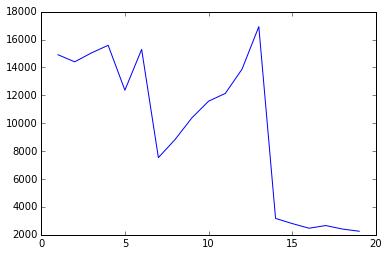

TypeError: __init__() got an unexpected keyword argument 'bin_size'

In [74]:
plt.plot(bin_seq,support)
plt.show()
pd.DataFrame(bin_size=bin_seq,F=support)

In [ ]:
EP_small = EP.loc[EP['num_friends']>1000,]
pd.DataFrame.boxplot(EP_small,'num_fans','gender')

In [53]:
range(1,10,2)

[1, 3, 5, 7, 9]